# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Prepare Datasets

In [2]:
directory = "./Face_Mask_Dataset/"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory+"Test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(250, 250),
    shuffle=True,
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory+"Train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(250, 250),
    shuffle=True,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory+"Validation",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(250, 250),
    shuffle=True,
)

Found 992 files belonging to 2 classes.
Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.


# Build model
## Conv

    

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

## Dense

In [5]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

# Train Model

In [7]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=100, 
                    validation_data=val_ds)

Epoch 1/100
313/313 [==============================] - 315s 1s/step - loss: 4.1935 - accuracy: 0.9114 - val_loss: 0.1746 - val_accuracy: 0.9488
Epoch 2/100
313/313 [==============================] - 311s 994ms/step - loss: 0.1088 - accuracy: 0.9629 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 3/100
313/313 [==============================] - 313s 1s/step - loss: 0.7069 - accuracy: 0.7822 - val_loss: 0.5982 - val_accuracy: 0.6975
Epoch 4/100
313/313 [==============================] - 301s 962ms/step - loss: 0.5732 - accuracy: 0.7277 - val_loss: 0.5728 - val_accuracy: 0.7538
Epoch 5/100
313/313 [==============================] - 306s 977ms/step - loss: 0.4792 - accuracy: 0.8050 - val_loss: 0.4937 - val_accuracy: 0.7900
Epoch 6/100
313/313 [==============================] - 299s 954ms/step - loss: 0.3598 - accuracy: 0.8473 - val_loss: 0.3484 - val_accuracy: 0.8775
Epoch 7/100
313/313 [==============================] - 299s 954ms/step - loss: 0.4067 - accuracy: 0.8321 - val_loss: 0.4893 

313/313 [==============================] - 302s 965ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.1415 - val_accuracy: 0.9737
Epoch 57/100
313/313 [==============================] - 302s 965ms/step - loss: 0.0262 - accuracy: 0.9904 - val_loss: 0.1562 - val_accuracy: 0.9700
Epoch 58/100
313/313 [==============================] - 303s 967ms/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.1714 - val_accuracy: 0.9787
Epoch 59/100
313/313 [==============================] - 303s 968ms/step - loss: 0.0060 - accuracy: 0.9964 - val_loss: 0.1939 - val_accuracy: 0.9762
Epoch 60/100
313/313 [==============================] - 301s 963ms/step - loss: 0.0313 - accuracy: 0.9934 - val_loss: 0.1093 - val_accuracy: 0.9688
Epoch 61/100
313/313 [==============================] - 303s 968ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.1180 - val_accuracy: 0.9700
Epoch 62/100
313/313 [==============================] - 310s 991ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.2092 

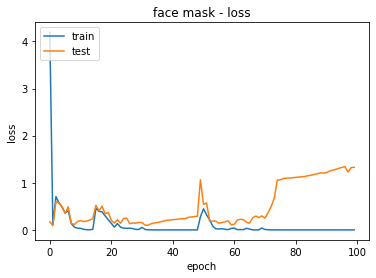

In [8]:
#loss value vs epochs graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('face mask - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

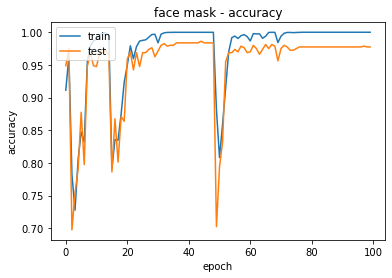

In [9]:
# accuracy vs epochs graph 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('face mask - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#according to both of them, the model is neither underfitting nor overfitting 